# Numpy


# Previous Weeks

*   Fundumentals of C Language. 
*   Recap of Python
*   Got Familiar with Linux
*   C-Python API

# Coming Lessons 
Scientific Computing and Data Science:  

*   Numpy
*   Pandas
*   Scikit









Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.




*   Mostly implemented in C and using Python as interface
*   NumPy arrays use contiguous blocks of memory that can be efficiently cached by the CPU
*   Python Lists are arrays of pointers to objects in random locations in memory (expensive memory-look-up)
*   Python lists easily remove add elements
*   Altering the size of Numpy array requires to create new array
*   Numpy is more elegant and efficient for numerical computations






To use Numpy, we first need to install `numpy` package:

In [ ]:
!pip install numpy

Then we import the `numpy` package:



In [ ]:
import numpy as np

## N-dimensional Arrays

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create 1-dimensional array
print(f"Type of array: {type(a)}, dimensions: {a.shape}, elements: {a[0], a[1], a[2]}")
a[0] = 5                 # Change an element of the array
print(a)                  

Type of array: <class 'numpy.ndarray'>, dimensions: (3,), elements: (1, 2, 3)
[5 2 3]


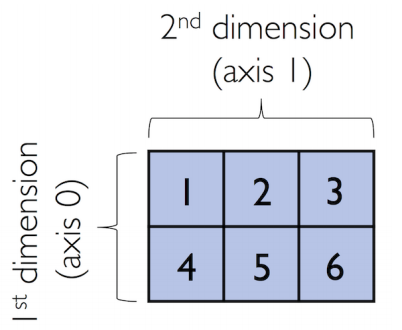

In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a 2-dimensional array 
print(b)

[[1 2 3]
 [4 5 6]]


In [ ]:
np.sum(b,axis=0)

array([5, 7, 9])

In [ ]:
b.dtype # data type of array's elemnts

dtype('int64')

In [ ]:
c = np.array([[1.2,2,3],[4,5.3,6]])

In [ ]:
c.dtype

dtype('float64')

type and shape is infered upon construction

In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


type of Numpy object is ndarray shortcut for n-dimensional arrays

In [ ]:
type(a)

numpy.ndarray

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

In [ ]:
print(b.shape)
print(b.size)
print(b.ndim)

(2, 3)
6
2


Numpy also provides many array construction routines:

In [ ]:
a = np.zeros((3,2,5))  # Create an array of all zeros
print(a)

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(3)        # Create a 3x3 identity matrix
print(d)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.63620515 0.2430636 ]
 [0.21524037 0.63499158]]


In [ ]:
np.arange(1., 11., 2) # similar to Python's range

array([1., 3., 5., 7., 9.])

The above routines are useful for placeholder for iterative calculation or initial values in ML.

##Array indexing

In this section, we will go over the basics of retrieving NumPy array elements via different
indexing methods. Simple NumPy indexing and slicing works similar to Python lists.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array.

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])
# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


## Filtering

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

filtered_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(filtered_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[filtered_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

##Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int32)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int32


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

##Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float32)
c = x + y
# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [ ]:
print(v @ w)

219


In [ ]:
# Matrix / vector product
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [ ]:
# Matrix / matrix product
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

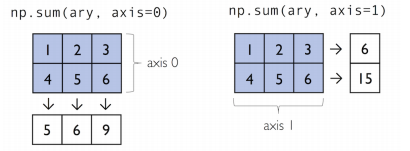

In [ ]:
x = np.array([[1,2,3],[4,5,6]])

print(np.sum(x))  # Compute sum of all elements
print(np.sum(x, axis=0))  # Compute sum of each column
print(np.sum(x, axis=1))  # Compute sum of each row

21
[5 7 9]
[ 6 15]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
print(x)
print("transpose\n", x.T)

[[1 2 3]
 [4 5 6]]
transpose
 [[1 4]
 [2 5]
 [3 6]]


In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


##Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays even if their dimensions do not match by when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.



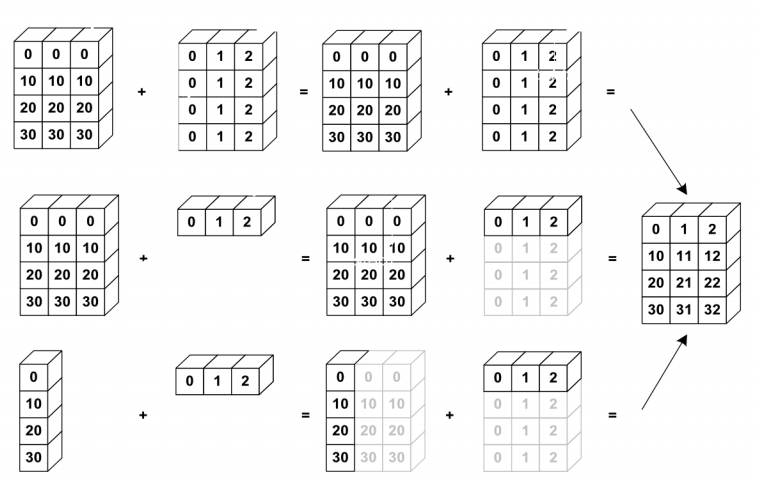

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)  

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [ ]:
y = x + vv  # Add x and vv elementwise
print(y)

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

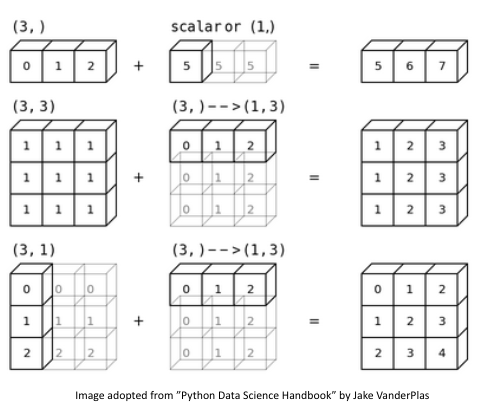

The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

##Linear Algebra

Numpy provides a library of linear algebra functions of matrices. 

In [ ]:
x = np.array([[1,2,3], [0,1,4], [5,6,0]])
x_inv = np.linalg.inv(x)

In [ ]:
print(x_inv)

[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


In [ ]:
x_inv.dot(x)

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -8.8817842e-16,  1.0000000e+00]])

In [ ]:
np.linalg.eigvals(x)

array([-5.2296696 , -0.02635282,  7.25602242])

In [ ]:
x.T #transpose

array([[1, 0, 5],
       [2, 1, 6],
       [3, 4, 0]])

For more functions see [Documentation](https://numpy.org/doc/stable/reference/routines.linalg.html).

## Fourier transform


In [ ]:
import numpy.fft

Detailed example for those who interested [FFT example](https://pythontic.com/visualization/signals/fouriertransform_fft)

##Random Seeds


In machine learning and deep learning, we often have to generate arrays of random numbers – for example, the initial values of our model parameters before optimization. NumPy
has a random subpackage to create random numbers and samples from a variety of distributions conveniently. Seeds ensures that our results are reproducible.

In [ ]:
np.random.seed(593)
np.random.rand(3)

array([0.1179011 , 0.76008265, 0.61310671])

In [ ]:
np.random.rand(3)

array([0.99767054, 0.20766141, 0.4758394 ])

In [ ]:
np.random.seed(593)
np.random.rand(3)

array([0.1179011 , 0.76008265, 0.61310671])

In [ ]:
rand(d0,d1,...,dn) #Random values in a given shape
randn(d0, d1, ...,dn) #Random standard normal
randint(lo, hi, size) #Random integers [lo, hi)
choice(a, size, repl, p) #Sample from a
shuffle(a) #Permutation (in-place)
permutation(a) #Permutation (new array)

# SciPy
SciPy is a library of algorithms and mathematical tools built to work
with NumPy arrays.


*   linear algebra - scipy.linalg
*   statistics - scipy.stats
*   optimization - scipy.optimize
*   sparse matrices - scipy.sparse
*   signal processing - scipy.signal (Filtering, convolution...)
*   Clustering











## statistics
*   Mean, median, mode, variance ...
*   Pearson correlation
*   Hypothesis tests
*   ...

#Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [ ]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

##Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(-2, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

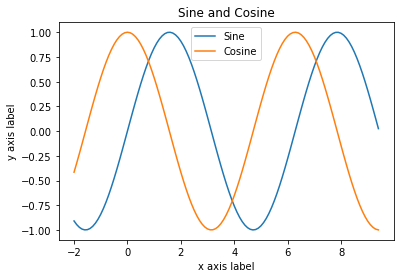

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

##Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

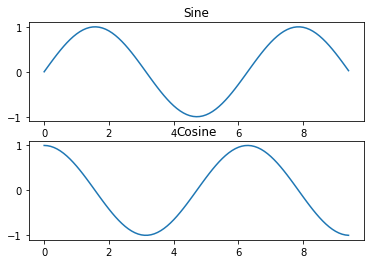

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

#Minimizing a Function With One Variable

In [ ]:
from scipy.optimize import minimize_scalar
def objective_function(x):
    return 3 * x ** 4 - 3 * x + 1

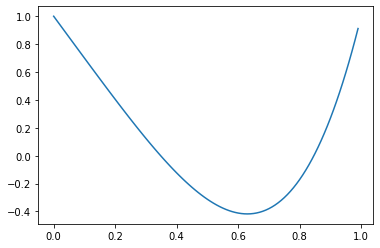

In [ ]:
x = np.arange(0, 1, 0.01)
y = objective_function(x)

# Plot the points using matplotlib
plt.plot(x, y)

In [ ]:
res = minimize_scalar(objective_function)

In [ ]:
res

     fun: -0.41741118113173226
    nfev: 15
     nit: 11
 success: True
       x: 0.6299605279579121

#CDF

In [ ]:
from scipy.stats import norm
# print norm.cdf(np.array([1,-1., 0, 1, 3, 4, -2, 6]))

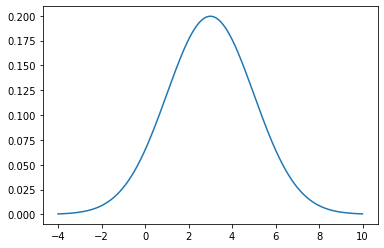

In [ ]:
x = np.arange(-4, 10, 0.01)
y = norm.pdf(x,3,2)

# Plot the points using matplotlib
plt.plot(x, y)

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(-2, 10, 0.01)
y = norm.cdf(x,3,2)

# Plot the points using matplotlib
plt.plot(x, y)